# E-commerce data - Regressione

Il dataset `E-commerce` (disponibile su [Kaggle](https://www.kaggle.com/datasets/carrie1/ecommerce-data/data)) contiene informazioni sui clienti di un negozio di e-commerce che vende vestiti. Il marchio offre sessioni di styling e consigli di moda con un personal stylist all'interno del negozio. I clienti possono poi ordinare gli abiti desiderati da casa utilizzando l'app mobile o il sito web.

L'azienda sta decidendo se investire per migliorare l'esperienza sull'app o sul sito web. L'obiettivo è cercare di ricavare dai dati alcune informazioni utili per prendere questa decisione.

In questo notebook utilizzeremo un dataset che deriva dal dataset appena descritto al quale sono state apportate alcune modifiche. Ogni riga del dataset descrive le caratteristiche di un cliente. Tra le variabili del dataset è presente anche la spesa annua totale effettuata da tale cliente. L'obiettivo sarà quello di sviluppare un modello di **regressione**, che ci permetterà di prevedere la spesa totale e di analizzarne i coefficienti per capire quali siano i fattori più determinanti.

Nella prima parte analizzeremo i dati e li prepareremo per la parte di implementazione del modello, nella seconda parte implementeremo un modello di regressione lineare semplice e faremo un confronto con altri modelli di regressione.

<a id="0"></a> <br>

# Indice
1. [Pre-processing dei dati](#1)
2. [Exploratory Data Analysis](#2)
3. [Implementazione e valutazione del modello di Regressione Lineare](#3)
4. [Altri modelli di regressione](#4)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

<a id="1"></a> <br>
## 1. Pre-processing dei dati


Lo step fondamentale prima di applicare un modello di Machine Learning è quello di studiare le caratteristiche principali dei dati per renderli utilizzabili dal modello che sceglieremo. In questa sezione, metteremo in pratica le tecniche viste nelle precedenti lezioni per analizzare il dataset, in particolare dovremo:
- caricare il dataset
- estrarre le prime descrizioni generali (dimensione, tipo di dati, variabili, ...)
- gestire i valori mancanti

- caricamento del dataset e descrizione generale

In [3]:
# Caricamento del dataset
df = pd.read_csv('../data/Ecommerce_Customers_mod.csv')

# Stampa le prime dieci righe
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Age,Seasonal Shopping Preference
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,38.0,All-Season
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,41.0,Summer
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,43.0,All-Season
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,22.0,Summer
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,50.0,All-Season
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448,41.0,All-Season
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175,47.0,All-Season
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146,54.0,Summer
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409,68.0,Summer
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385,39.0,All-Season


In [4]:
# Che dimensione ha il dataset? Quante righe e quante colonne ha?
df.shape

(505, 10)

In [5]:
# Quali sono i nomi delle variabili presenti nel dataset? I nomi delle variabili sono contenuti nella lista delle colonne del dataframe
df.columns.to_list()

['Email',
 'Address',
 'Avatar',
 'Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent',
 'Age',
 'Seasonal Shopping Preference']

Le variabili incluse nel dataset sono:

- **Email**: indirizzo e-mail
- **Indirizzo**: indirizzo di consegna
- **Avatar**: nickname
- **Avg. Session Length**: tempo medio trascorso nelle sessioni di consulenza stilistica in negozio (in minuti)
- **Time on App**: tempo medio trascorso sull'app (in minuti)
- **Time on Website**: tempo medio trascorso sul sito web (in minuti)
- **Length of Membership**: da quanti anni il cliente è membro
- **Yearly Amount Spent**: importo totale speso durante un anno
- **Age**: età del cliente
- **City District**: quartiere della città in cui il cliente vive

In [6]:
# Alcune informazioni importanti sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Email                         505 non-null    object 
 1   Address                       504 non-null    object 
 2   Avatar                        505 non-null    object 
 3   Avg. Session Length           503 non-null    float64
 4   Time on App                   503 non-null    float64
 5   Time on Website               503 non-null    float64
 6   Length of Membership          503 non-null    float64
 7   Yearly Amount Spent           503 non-null    float64
 8   Age                           504 non-null    float64
 9   Seasonal Shopping Preference  504 non-null    object 
dtypes: float64(6), object(4)
memory usage: 39.6+ KB


In [7]:
# Tipo di dato in ogni colonna
df.dtypes

Email                            object
Address                          object
Avatar                           object
Avg. Session Length             float64
Time on App                     float64
Time on Website                 float64
Length of Membership            float64
Yearly Amount Spent             float64
Age                             float64
Seasonal Shopping Preference     object
dtype: object

In [8]:
# Caratteristiche statistiche principali per le variabili numeriche
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Age
count,503.000000,503.000000,503.000000,503.000000,503.000000,504.000000
mean,33.050259,12.059031,37.062140,3.538081,499.497848,43.902778
std,0.995707,0.995491,1.016317,0.999510,79.177996,15.047588
min,29.532429,8.508152,33.913847,0.269901,256.670582,18.000000
25%,32.340848,11.388629,36.346012,2.933598,445.406013,31.000000
50%,33.085298,12.005916,37.067090,3.535802,499.140152,43.000000
75%,33.709403,12.760350,37.716878,4.127420,549.496082,56.250000
max,36.139662,15.126994,40.005182,6.922689,765.518462,70.000000


In [9]:
# Controlla se ci sono valori duplicati e in caso affermativo rimuovili
# Numero di righe duplicate
df.duplicated().sum()

np.int64(2)

In [10]:
# Righe duplicate
df[df.duplicated(keep=False)]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Age,Seasonal Shopping Preference
315,david28@wallace-hill.org,"43382 Heather Meadows\nNew Lisaburgh, WI 19151...",LightBlue,33.384111,12.677401,35.622531,3.680847,528.309225,37.0,Summer
316,david28@wallace-hill.org,"43382 Heather Meadows\nNew Lisaburgh, WI 19151...",LightBlue,33.384111,12.677401,35.622531,3.680847,528.309225,37.0,Summer
431,randall85@williams.com,"5086 Morales Islands Apt. 099\nNew Patricia, I...",Black,33.625307,12.988221,39.672591,3.969418,581.798798,38.0,Winter
432,randall85@williams.com,"5086 Morales Islands Apt. 099\nNew Patricia, I...",Black,33.625307,12.988221,39.672591,3.969418,581.798798,38.0,Winter


In [11]:
# Rimuovi le righe duplicate
df.drop_duplicates(inplace=True)

Quale potrebbe essere una motivazione per queste righe dupicate?

- valori mancanti

In [12]:
# Quanti valori nulli ci sono in ogni colonna?
df.isna().sum()

Email                           0
Address                         1
Avatar                          0
Avg. Session Length             2
Time on App                     2
Time on Website                 2
Length of Membership            2
Yearly Amount Spent             2
Age                             1
Seasonal Shopping Preference    1
dtype: int64

In [13]:
# Controlla quali righe sono
df[df.isnull().any(axis=1)]

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Age,Seasonal Shopping Preference
87,bart123@gmail.com,NaN,BlueSky,30.673982,13.78291,36.738465,5.273652,480.290184,30.0,All-Season
291,juliettebc@yahoo.com,"245 Tomson Street\nHoly Hill, DK 9843",RedRose,NaN,NaN,NaN,NaN,NaN,30.0,Winter
389,sophienelly@yahoo.com,"2765 Elm Street\nSmalltown, AZ 3452",YellowSun,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Elimina le righe che hanno almeno un valore mancante
df.dropna(inplace=True) 

In [15]:
# Controlla che l'operazione sia andata a buon fine (controlliamo se sono rimasti valori mancanti)
df.isna().sum()

Email                           0
Address                         0
Avatar                          0
Avg. Session Length             0
Time on App                     0
Time on Website                 0
Length of Membership            0
Yearly Amount Spent             0
Age                             0
Seasonal Shopping Preference    0
dtype: int64

Perchè in questo caso può essere sensato eliminare direttamente le righe con valori mancanti? Quale potrebbe essere un'alternativa?

In [16]:
# Resettiamo il valore degli indici per evitare problemi successivi
df.reset_index(inplace=True, drop=True)

- variabili categoriche

Ci sono variabili categoriche nel dataset?

Pensi che alcune di queste possano essere importante per prevedere la spesa ttale di un cliente? Come possiamo trasformarle in varaibili numeriche?

Abbiamo visto due metodi per trasformare le variabili categoriche in numeriche: OrdinalENcoder e OneHotEncoder. Quali sono le loro caratteristiche? In quali contesti possono essere più adatti? Quali problematiche vedi nella loro applicazione in questo problema?

In [17]:
# Quante preferenze stagionali ci sono?
df["Seasonal Shopping Preference"].unique()

array(['All-Season', 'Summer', 'Winter'], dtype=object)

In [18]:
# One-Hot Encoding per 'Seasonal Shopping Preference'
from sklearn.preprocessing import OneHotEncoder

# Inizializzazione dell'encoder
encoder = OneHotEncoder(sparse_output=False)

# Slezioniamo la variabile categorica da codificare
genre_encoded = encoder.fit_transform(df[['Seasonal Shopping Preference']])

# Convertiamo i dati codificati in un DataFrame con nomi delle colonne significativi
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Seasonal Shopping Preference']))

# Aggiungiamo le colonne codificate nel DataFrame originale
df = pd.concat([df, genre_encoded_df], axis=1)

# Eliminiamo la colonna originale 'Embarked' dal dataset
df = df.drop(['Seasonal Shopping Preference'], axis=1)

# Mostriamo il DataFrame aggiornato
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Age,Seasonal Shopping Preference_All-Season,Seasonal Shopping Preference_Summer,Seasonal Shopping Preference_Winter
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,38.0,1.0,0.0,0.0
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,41.0,0.0,1.0,0.0
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,43.0,1.0,0.0,0.0
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,22.0,0.0,1.0,0.0
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,50.0,1.0,0.0,0.0


<a id="2"></a> <br>

## 2. Exploratory data analysis (EDA)

In questa sezione utilizzeremo dei metodi di visualizzazione dei dati per continuare ad analizzare le caratteristiche del dataset. 
In particolare dovremo:
- plottare la correlation heatmap per valutare la correlazione tra le diverse variabili
- distribuzione delle variabili

- correlazione

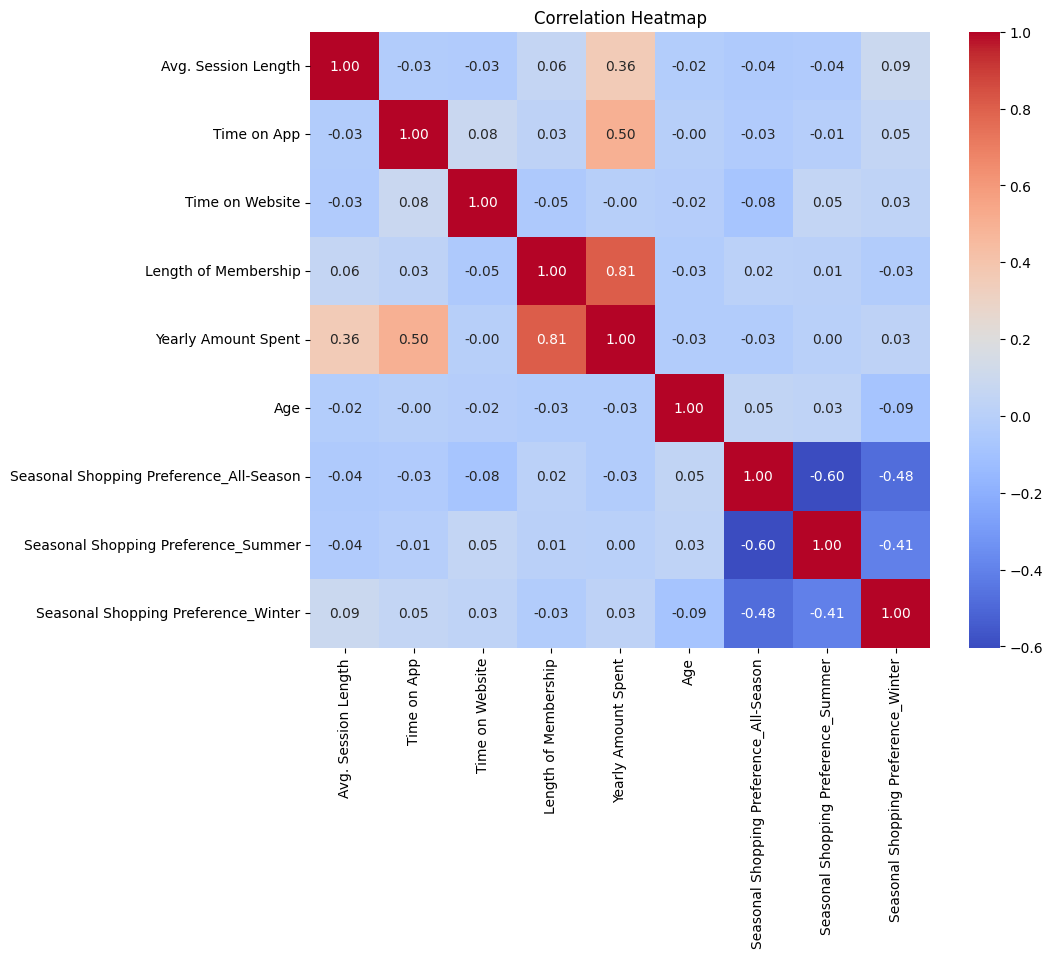

In [19]:
# Stampiamo la correlation heatmap per valutare la correlazione tra le variabili
plt.figure(figsize=(10, 8))
df_without_seasonal_preference = df.drop(columns=[col for col in df.columns if col.startswith('Seasonal')])
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Quali sono le variabili che hanno la correlazione più alta? Sapresti spiegare il perchè?

- distribuzioni

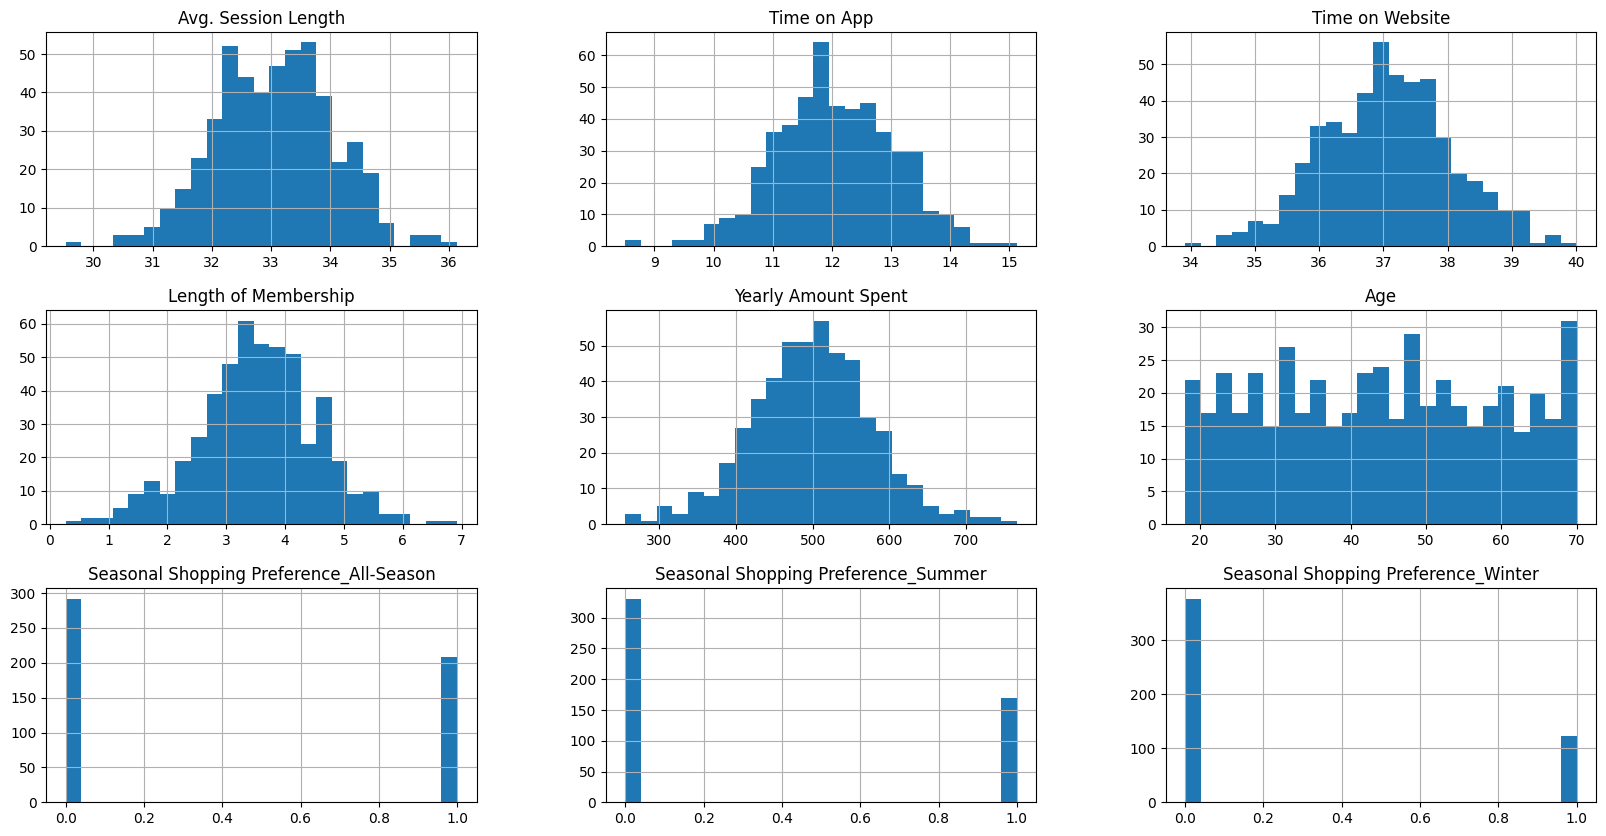

In [20]:
# Studiamo la distribuzione delle variabili presenti nel dataset
df.hist(bins=25,figsize=(20,10))
plt.show()

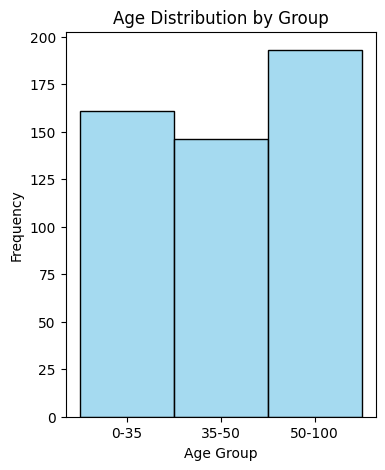

In [21]:
# Controlla la distribuzione dell'età. Qual è il gruppo che ha più clienti?
bins = [0, 35, 50, 100]
labels = ['0-35', '35-50', '50-100']

# Plotting the histogram without creating a new column
plt.figure(figsize=(4,5))
sns.histplot(pd.cut(df['Age'], bins=bins, labels=labels, right=False), kde=False, discrete=True, color='skyblue')
plt.title('Age Distribution by Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_18584/4127878707.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age Group')['Yearly Amount Spent'].mean()


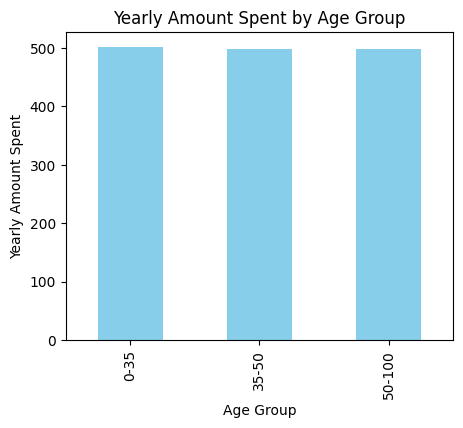

In [22]:

# Create the bar plot for the yearly amount spent by age group
plt.figure(figsize=(5,4))
plt.title("Yearly Amount Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Yearly Amount Spent")
plt.xticks(rotation=45)

# Use pd.cut to create age groups directly during groupby
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the data by the 'Age Group' and calculate the mean of 'Yearly Amount Spent'
grouped = df.groupby('Age Group')['Yearly Amount Spent'].mean()

# Plot the bar chart
grouped.plot(kind='bar', color='skyblue')

plt.show()

Cosa puoi dedurre da questo grafico? La variabile 'Age' sarà importante per prevedere la spesa totale?

<a id="3"></a> <br>

## 3. Implementazione e valutazione del modello di Regressione Lineare

In questa sezione costruiremo e alleneremo il modello di regressione lineare per cercare di prevedere il numero totale di casi per milione di abitanti (seguendo gli step illustrati nella presentazione). Infine valuteremo il modello ottenuto calcolando diverse metriche.

LinearRegression (documentazione): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

In [24]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent', 'Age',
       'Seasonal Shopping Preference_All-Season',
       'Seasonal Shopping Preference_Summer',
       'Seasonal Shopping Preference_Winter', 'Age Group'],
      dtype='object')

In [25]:
# Quali pensi possano essere le variabili utili per la regressione? 
# Seleziona una lista di variabili che utilisserai per costruire il modello di regressione
features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Seasonal Shopping Preference_All-Season',
       'Seasonal Shopping Preference_Summer'] #,'Seasonal Shopping Preference_Winter',]

In [26]:
# Definiamo le variabili di input (X) e di output (y)
X = df[features]
y= df['Yearly Amount Spent']

In [27]:
# Dividiamo i dati in training (80%) e test(20%)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.20 , random_state=42)


In [28]:
X_train.shape

(400, 6)

In [29]:
# Standardizziamo i dati
ro_scaler=StandardScaler()
X_train=ro_scaler.fit_transform(X_train)
X_test=ro_scaler.transform(X_test)

In [30]:
model=LinearRegression()

In [31]:
# Alleniamo il modello sui dati di training
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# Facciamo previsioni sui dati di test
y_predict = model.predict(X_test)


In [33]:
# Valutiamo il modello

# calcoliamo le diverse metriche (R2, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolupte Percentage Error (MAPE))
r_squared = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
mape = mean_absolute_percentage_error(y_test, y_predict) # Misura l'errore medio in percentuale rispetto ai valori reali

print('R squared (R2):',r_squared)
print(f'Mean Squared Error (MSE):{mse}')
print(f'Root Mean Squared Error (RMSE):{rmse}')
print(f'Mean Absolute Error (MAE):{mae}')
print("Mean  absolute precentage error of linear regression : ",mape*100,'%')

R squared (R2): 0.9780754445583746
Mean Squared Error (MSE):108.56449791849101
Root Mean Squared Error (RMSE):10.419428867192819
Mean Absolute Error (MAE):8.592936351611597
Mean  absolute precentage error of linear regression :  1.8019849403045722 %


In [34]:
# Coefficienti del modello
model.coef_

array([25.26111794, 38.73799961,  0.2384756 , 63.48900882, -0.10422133,
        1.01263109])

In [35]:
threshold = 1e6  # Only round numbers smaller than 1 million
cdf = pd.DataFrame(np.round(model.coef_, 2),X.columns,columns=['Coef'])
print(cdf)

                                          Coef
Avg. Session Length                      25.26
Time on App                              38.74
Time on Website                           0.24
Length of Membership                     63.49
Seasonal Shopping Preference_All-Season  -0.10
Seasonal Shopping Preference_Summer       1.01


Quali sono le variabili che hanno un coefficiente più alto? Cosa puoi dedurre?